In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

2024-10-24 10:00:44.540410: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-24 10:00:44.544966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-24 10:00:44.556506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 10:00:44.577972: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 10:00:44.584155: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 10:00:44.600518: I tensorflow/core/platform/cpu_feature_gu

In [27]:
from medmnist import ChestMNIST
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [28]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [11]:
test_dataset = ChestMNIST(split="test", download=True, size=128)

100%|██████████| 1.43G/1.43G [00:11<00:00, 122MB/s] 


In [12]:
train_dataset = ChestMNIST(split="train", download=True, size=128)

Using downloaded and verified file: /home/jupyter/.medmnist/chestmnist_128.npz


In [26]:
type (test_dataset)

medmnist.dataset.ChestMNIST

In [17]:
train_dataset

Dataset ChestMNIST of size 128 (chestmnist_128)
    Number of datapoints: 78468
    Root location: /home/jupyter/.medmnist
    Split: train
    Task: multi-label, binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'atelectasis', '1': 'cardiomegaly', '2': 'effusion', '3': 'infiltration', '4': 'mass', '5': 'nodule', '6': 'pneumonia', '7': 'pneumothorax', '8': 'consolidation', '9': 'edema', '10': 'emphysema', '11': 'fibrosis', '12': 'pleural', '13': 'hernia'}
    Number of samples: {'train': 78468, 'val': 11219, 'test': 22433}
    Description: The ChestMNIST is based on the NIH-ChestXray14 dataset, a dataset comprising 112,120 frontal-view X-Ray images of 30,805 unique patients with the text-mined 14 disease labels, which could be formulized as a multi-label binary-class classification task. We use the official data split, and resize the source images of 1×1024×1024 into 1×28×28.
    License: CC BY 4.0

In [32]:
data_flag = 'pathmnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
print(info)
task = info['task']
print(task)
n_channels = info['n_channels']
print(n_channels)
n_classes = len(info['label'])
print(n_classes)

DataClass = getattr(medmnist, info['python_class'])
print(DataClass)

{'python_class': 'PathMNIST', 'description': 'The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.', 'url': 'https://zenodo.org/records/10519652/files/pathmnist.npz?download=1', 'MD5': 'a8b06965200029087d5bd730944a56c1', 'url_64': 'https://zenodo.org/records/10519652/files/pathmnist_64.npz?download=1', 'MD5_64': '55aa9c1e0525abe5a6b9d8343a507616', 'url_128': 'https://zenodo.org/records/10519652/files/pathmnist_128.npz?download=1', 'MD5_128': 

In [33]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

100%|██████████| 206M/206M [00:13<00:00, 14.9MB/s] 


Using downloaded and verified file: /home/jupyter/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/jupyter/.medmnist/pathmnist.npz


In [34]:
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

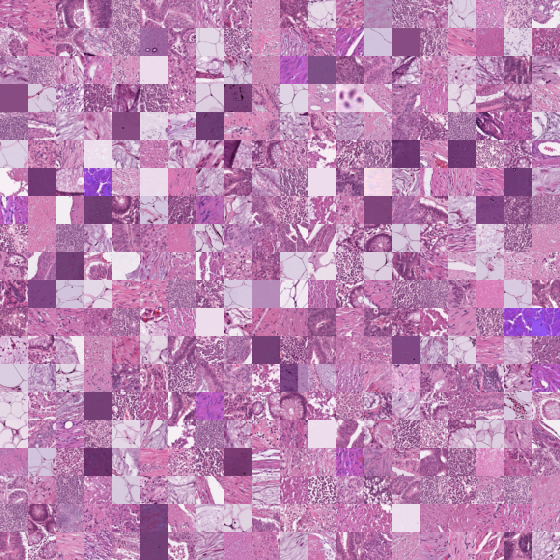

In [36]:
# visualization

train_dataset.montage(length=20)

In [9]:
npy_file = "ch2_dataset/train_images.npy"
data = np.load(npy_file)

print(data)

ValueError: cannot reshape array of size 101711744 into shape (78468,128,128)

In [8]:
# Load the .npz file
npz_file = "ch2_dataset/chestmnist_128.npz"
data = np.load(npz_file)


BadZipFile: File is not a zip file

In [4]:


# Check the keys (if the npz file has multiple arrays)
print(data.files)

# Assuming 'features' and 'labels' are two arrays in the npz file
features = data['features']
labels = data['labels']

# Convert the NumPy arrays to TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

FileNotFoundError: [Errno 2] No such file or directory: '/codecrusaders_bayhackathon/ch2_dataset/chestmnist_128.npz'